In [15]:
import torch as tch
import numpy as np
from classes.connectivity_blocks import *
from classes.network_dynamics import *
from classes.task import *
from classes.mft import *
import pickle
import pandas as pd
import scipy.io as sio

import matplotlib as mpl
new_rc_params = {'text.usetex': False,
"svg.fonttype": 'none'
}
mpl.rcParams.update(new_rc_params)

In [16]:
def model_parameters():
    modelparams = dict(
            seed = 4,
            #network parameters
            n_ctx = 89,
            N_block = 400, #neurons per region
            N_recorded = 150, #neurons recorded per region

            #transfer function Pereira&Brunel,18
            rm = 1,#76.2,
            beta = 1, #Pereira&Brunel
            h0 = .1,
            amp_offset = 1,

            #dynamics excitatory
            tau_ctx =  60 * 1e-3,#s mainly NMDA

            #private noise 
            sigma_noise = 0,

            #Low-d noise
            sigma_ld = 22,
            tau_ld = 100 * 1e-3,
            mu_ld = 0,
            
            #spines dependencies
            A_spines = 1,#10
            offset_spines = .1,
            
            #noise
            amp_loc_noise = 0.1,#0.0, #amp noise local dorsal
            amp_lr_noise = 0.1,#0.0, #ventral<->ventral amp noise long-range

            #hebbian 
            amp_loc = 0,
            amp_lr = 0,

            #stimulation parameters
            period = 10., # 20 seconds
            dt = 15. * 1e-3,# indegration time
            t_stim = .5, #period-t_stim when stimulus
            t_start = 2.5, #t_starts
            g_p= 1.5
            
            )
    return modelparams


In [17]:
def loading_matrices(gamma, path=''):
    ''' this functions load the matrices and normalize them'''
    PATH = path + 'connectivity_data/'
    tract = sio.loadmat(PATH + 'FSe_tractography.mat')
    names_ctx = [tract['area_list_Sean_89'][0][l][0] for l in range(89)] 
    fln = pickle.load(open(PATH + 'mat_tractography.p','rb'))
    hier_tract =sio.loadmat(PATH + 'hierarchy_89_areas.mat')
    hierarchy = np.array([x for x in hier_tract['hierarchy_vals_fullgraph'][:,0]])
    t1_t2 = sio.loadmat(PATH + 'myelin_hierarchy_order.mat')
    t1_t2_val = t1_t2['myelin_hierarchy_order'][:,0]
    t1_t2_val = -(t1_t2_val - np.max(t1_t2_val))/(np.max(t1_t2_val) - np.min(t1_t2_val)) #normalizing
    spines = pickle.load(open(PATH + 'spines_89.p','rb')) 
    sln = pickle.load(open(PATH+'sln_matrix.p','rb'))
    #sln = np.ones(fln.shape) 
    cognitive_subnetworks = pickle.load(open(PATH + 'cognitive_subnetworks.p', 'rb'))
    #matrices
    fln2 =   fln**gamma
    fln2 = np.einsum('ij,i->ij',fln2, 1/np.sum(fln2,axis =1)) 
    connectivity = dict(
            fln = fln2,
            sln = sln,
            spines = spines, 
            hierarchy = hierarchy, 
            hierarchy_t1t2 = t1_t2_val,
            names_ctx = names_ctx,
            cognitive_subnetworks = cognitive_subnetworks 
            )
    return connectivity


tract = sio.loadmat('connectivity_data/FSe_tractography.mat')
names = [tract['area_list_Sean_89'][0][l][0] for l in range(89)] 
names_ctx = []
inds_full = []
for l in range(89):
    names_ctx.append(names[l])
    inds_full.append(l)


In [21]:
# importing monkey connectivity
connectivity_params = loading_matrices(.3)

#model parameters
modelparams = model_parameters()
modelparams['amp_loc_noise'] = 2.#2.2
modelparams['amp_lr_noise'] = 2.75#3.5
modelparams['amp_loc'] = 2.05
modelparams['amp_lr'] = 3.4
modelparams['A_spines'] = .4
modelparams['offset_spines'] = .6

#names
names_ctx  = connectivity_params['names_ctx']
fpn_wm = connectivity_params['cognitive_subnetworks']['FPN']+[names_ctx.index('LIP')]

#creating connectivity
connectivity = CorticalConnectivity(modelparams, connectivity_params)
connectivity.hebbian_symmetric.p_asym = 8
connectivity.hebbian_symmetric.p_sym = 1
inds = []
amp_inds = [(2.2,0)] 
inds.append(fpn_wm)
connectivity.hebbian_symmetric.update_indexes(inds, amp_inds)

In [22]:
#creating network
modelparams['period'] = 8.
modelparams['g_p'] = 0
modelparams['beta'] = 2.5#1.5
modelparams['h0'] = 1.13#1.1


task = working_memory_task(modelparams, connectivity)
network = NetworkDynamics(modelparams, connectivity)
network.input_ctx = task.input_current
#network.which_tf = 'sig'

#running dynamics
s0_ctx =  0 * np.random.uniform(0,.1, network.mat.shape[0])
s = 0
amp_in = 10000000
for l in inds[s]:
    Nl = l * connectivity.N
    Nlp1 = (l + 1) * connectivity.N
    s0_ctx[Nl : Nlp1] = amp_in * connectivity.hebbian_symmetric.patterns_current_sym[l, :, s, 0]
results = network.dynamics(s0_ctx)

area =  0
area =  1
area =  2
area =  3
area =  4
area =  5
area =  6
area =  7
area =  8
area =  9
area =  10
area =  11
area =  12
area =  13
area =  14
area =  15
area =  16
area =  17
area =  18
area =  19
area =  20
area =  21
area =  22
area =  23
area =  24
area =  25
area =  26
area =  27
area =  28
area =  29
area =  30
area =  31
area =  32
area =  33
area =  34
area =  35
area =  36
area =  37
area =  38
area =  39
area =  40
area =  41
area =  42
area =  43
area =  44
area =  45
area =  46
area =  47
area =  48
area =  49
area =  50
area =  51
area =  52
area =  53
area =  54
area =  55
area =  56
area =  57
area =  58
area =  59
area =  60
area =  61
area =  62
area =  63
area =  64
area =  65
area =  66
area =  67
area =  68
area =  69
area =  70
area =  71
area =  72
area =  73
area =  74
area =  75
area =  76
area =  77
area =  78
area =  79
area =  80
area =  81
area =  82
area =  83
area =  84
area =  85
area =  86
area =  87
area =  88
Simulation t= 0.0
Simulation t=

In [23]:


ov_init_subnet = tch.tensor(results['overlaps_sym'][-1,:,0,0])
# float transform
ov_init_subnet = ov_init_subnet.float()
ov_init_subnet = ov_init_subnet.to('mps')
delta_init_subnet = tch.tensor(results['del0'])
delta_init_subnet = delta_init_subnet.float()
delta_init_subnet = delta_init_subnet.to('mps')

#structural connectivity
spines = connectivity.spines
fln = connectivity.mat

#connectivity random
mat_not_diag = np.ones(fln.shape) - np.eye(fln.shape[0])
mat_diag = np.eye(fln.shape[0])
connectivity_random = modelparams['amp_lr_noise'] * mat_not_diag  + modelparams['amp_loc_noise'] * mat_diag

#connectivity Hebbian
connectivity_hebb = np.zeros_like(fln)
ind_subnet = 0
for i in range(89):
    for j in range(89):
        if i in inds[ind_subnet] and j in inds[ind_subnet]:
            if i==j:
                connectivity_hebb[i,j] = modelparams['amp_loc'] * amp_inds[ind_subnet][0]
            else:
                connectivity_hebb[i,j] = modelparams['amp_lr'] * amp_inds[ind_subnet][0]

params = dict(
        device = 'mps',
        n_iterations = 100,
        ovs_init = ov_init_subnet,
        xmin = -10.,
        xmax = 10.,
        dx = 0.01,
        spines = spines,
        fln = fln,
        con_hebb = connectivity_hebb,
        con_rand = connectivity_random,
        h0 = modelparams['h0'],
        beta = modelparams['beta']
        )




In [24]:

epochs =10
ovs= ov_init_subnet
delt = delta_init_subnet

smft = SMFTSolver(params)
for epoch in range(epochs):
    ov_result, delta_result, rates, jac = smft.forward(ovs)
    smft.ovs_init = ov_result[-1,:].detach().clone()
    smft.dels_init = delta_result[-1,:].detach().clone()
    print(epoch)
  

    #print(list(smft.parameters())[0].grad)
   


/Users/ulises/Documents/Projects/2024/brainwide/Fig3/classes/mft.py:35: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.gauss =tch.tensor(gauss, dtype=tch.float32, device=self.device)
/Users/ulises/Documents/Projects/2024/brainwide/Fig3/classes/mft.py:40: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.gauss_y =tch.tensor(gauss_y, dtype=tch.float32, device=self.device)


0
1
2
3
4
5
6
7
8
9


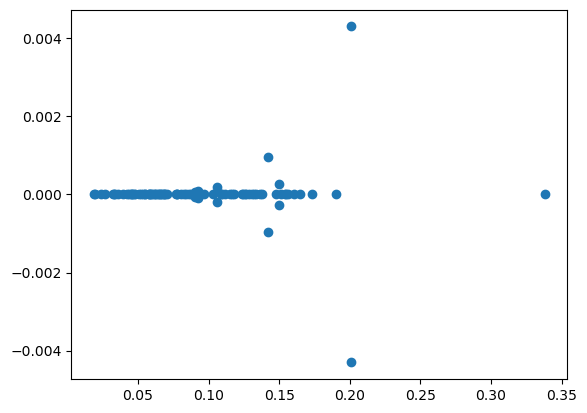

In [14]:
#eingenvalues of the jacobian
jacobian = jac.detach().cpu().numpy()
eigenvalues = np.linalg.eigvals(jacobian)
#plot eigenvalues
plt.scatter(eigenvalues.real, eigenvalues.imag)

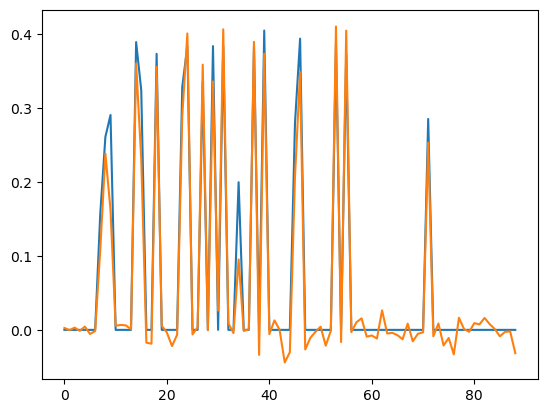

In [12]:
plt.plot(ov_result[-1,:].detach().cpu().numpy())
plt.plot(results['overlaps_sym'][-1,:,0,0])

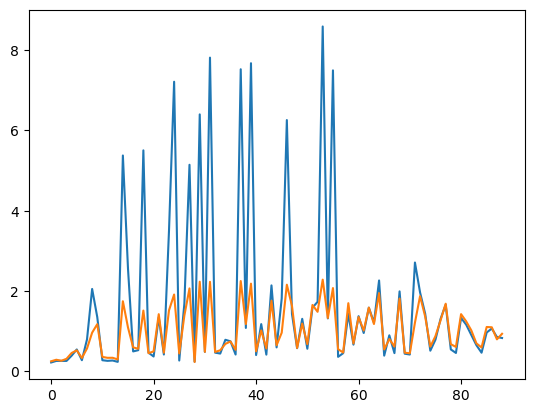

In [11]:
plt.plot(results['del0'][-1,:])
plt.plot(delta_result[-1,:].detach().cpu().numpy())

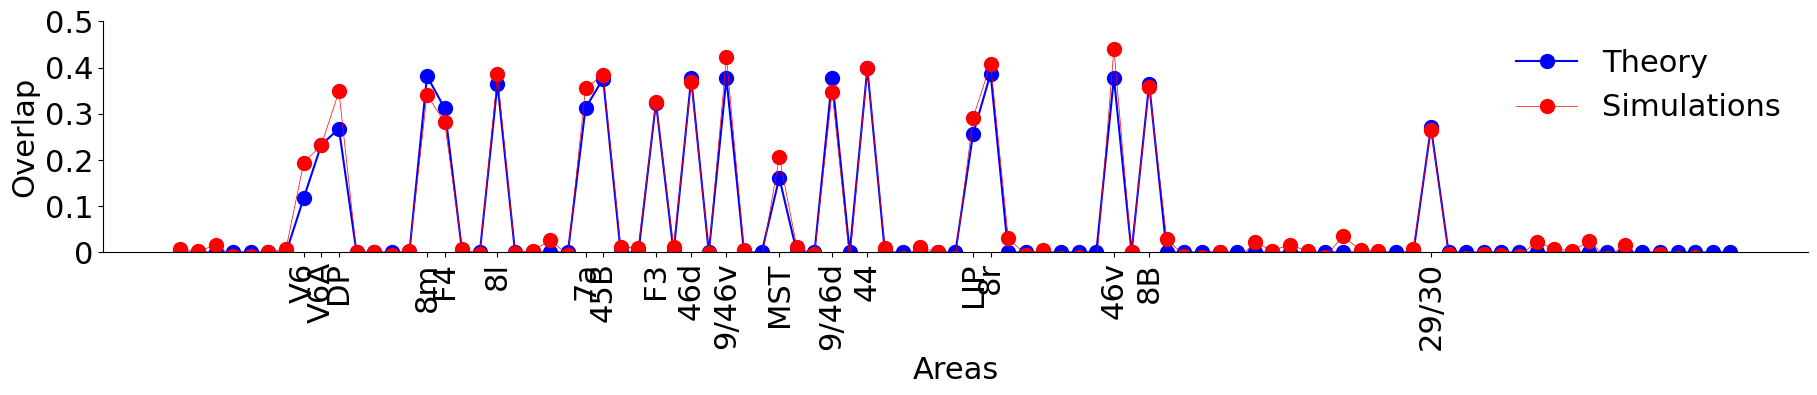

In [25]:
names_ticks = []
for l in range(89):
    if l % 2 == 0:
        names_ticks.append(names_ctx[l])
    else:
        names_ticks.append(names_ctx[l])

overlaps = results['overlaps_sym']
fs = 16
fig = plt.figure(figsize=(22, 3))
ax = fig.add_subplot(111)

#ax.plot(overlaps[-1,:,0,0], color='k', marker='o', label = 'Simulation')
ovs_sim  = np.mean(results['overlaps_sym'][300:,:,0,0],axis=0)
ax.plot(ov_result[-1,:].detach().cpu().numpy(), color='b', marker='o',  markersize=10, label = 'Theory')
ax.plot(ovs_sim, color='r', marker='o', label = 'Simulations',lw=0.5, markersize=10)
ax.set_xlabel('Areas', fontsize=22)
ax.set_ylabel('Overlap', fontsize=22)
ax.set_xticks(fpn_wm)
ax.set_xticklabels([names_ticks[x] for x in fpn_wm], rotation=90, fontsize=22)
ax.set_ylim([0,.5])
ax.set_yticks([0,.1,.2,.3,.4,.5])
ax.set_yticklabels([0,.1,.2,.3,.4,.5], fontsize=22)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.legend(fontsize=22, frameon=False)
plt.savefig('figures/panels/overlap_mft.pdf', bbox_inches='tight')
#plt.savefig('overlap_mft.pdf', bbox_inches='tight')

In [20]:
300 * 15 * 1e-3

4.5